In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


## Computing the probability density

In [9]:
def compute_p(X, mean, sigma):
    """
    Implement the probability density
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    coeff = 1/((2*np.pi)**(X.shape[1]/2) * np.sqrt(np.linalg.det(sigma)))
    #sigma_inv = np.linalg.inv(sigma)
    #vec = X - mean
    #p = np.exp(-(1/2) * (vec.T).dot(vec.dot(sigma_inv)))
    #p = coeff * p
    # The constant (same for all samples) term
    invSigma = np.linalg.inv(sigma)

    result = np.zeros((n,))
    for i in range(n):
        xmu = X[i] - mean
        result[i] = coeff * np.exp(-0.5 * (xmu).T.dot(invSigma).dot(xmu))

    return result

def compute_log_p(X, mean, sigma):
    return np.log(compute_p(X, mean, sigma))

def compute_log_p_solution(X, mean, sigma):
    dxm = X - mean
    return (
        -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
        - np.log(2 * np.pi) * (d / 2)
        - 0.5 * np.log(np.linalg.det(sigma))
    )

|a-b|_2 = 4.9704002252021334e-15


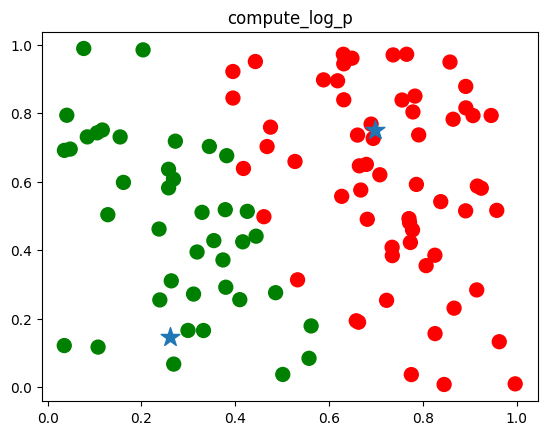

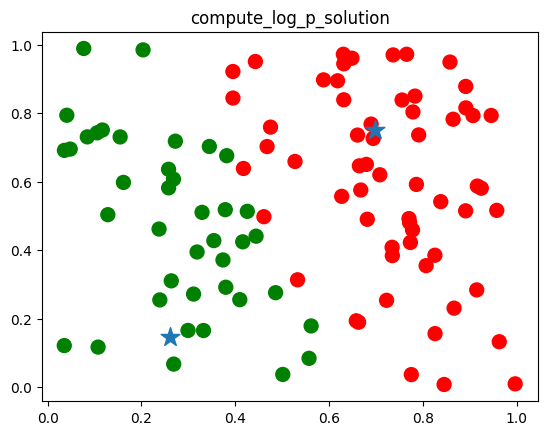

In [10]:
a = compute_log_p(X, means[0], sigmas[0])
b = compute_log_p_solution(X, means[0], sigmas[0])

print("|a-b|_2 =", np.linalg.norm(a - b))

### -----
### Print the graphs


def makeGraph(function, X, means, sigmas):
    log_ps = [function(X, m, s) for m, s in zip(means, sigmas)]

    assignments = np.argmax(log_ps, axis=0)

    colors = np.array(["red", "green"])[assignments]
    plt.title(function.__name__)
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
    plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
    plt.show()


makeGraph(compute_log_p, X, means, sigmas)
makeGraph(compute_log_p_solution, X, means, sigmas)

In [6]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

NameError: name 'c' is not defined

In [ ]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[[0 0]
 [0 0]]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array([['red', 'red'],
       ['red', 'red']], dtype='<U5')

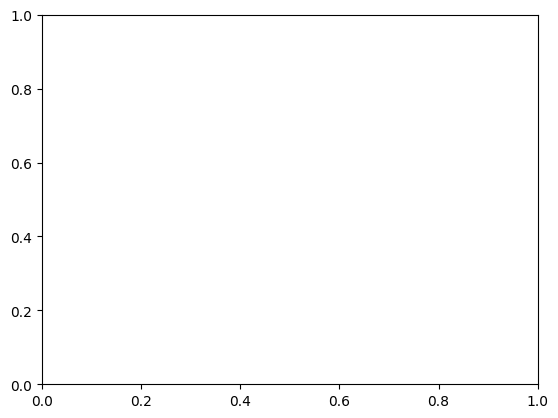

In [ ]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

## Computing the log-probability directly

**Why log?** - Our goal is to compare probabilities to see to which of the two stars a point belongs.

But the formula for the probability is a bit heavy, with multiplications and exponents.

By applying a log transform, we get additions and multiplications, which is easer to handle, and does not impact the comparison - if `a > b`, `log(a) > log(b)`.

(If it does not make sense - don't worry - you'll see this in the coming lectures)


In [ ]:
def compute_log_p(X, mean, sigma):
    """
    Implement
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    raise NotImplementedError

In [ ]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [ ]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

In [ ]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()